
##Project - Price Prediction for Mobile Phones

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
import joblib
import re

##Data Exploration

In [3]:
mobile_data = pd.read_csv("/content/sample_data/Processed_Flipdata.csv")
mobile_data

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


#Data Overview

In [4]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


In [5]:
mobile_data.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000


#Finding Missing Values

In [6]:
mobile_data.isna().sum()

Unnamed: 0       0
Model            0
Colour           0
Memory           0
RAM              0
Battery_         0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Processor_       0
Prize            0
dtype: int64

In [7]:
#removing commas from prize and converting dtype to int
mobile_data['Prize']=[int(value.replace(",",""))for value in mobile_data['Prize']]

In [8]:
mobile_data['Prize']

0       7299
1       7299
2      11999
3       5649
4       8999
       ...  
536    79999
537     5998
538     9990
539    38999
540    15999
Name: Prize, Length: 541, dtype: int64

In [9]:
mobile_data.describe().round(2)

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.00,541.00,541.00,541.00,541.00,541.00,541.00
mean,289.71,110.55,5.40,4871.59,0.06,16.43,16228.38
std,182.36,60.60,1.98,780.15,0.24,2.52,10793.59
min,0.00,16.00,2.00,800.00,0.00,4.50,920.00
25%,135.00,64.00,4.00,5000.00,0.00,16.51,9290.00
50%,273.00,128.00,6.00,5000.00,0.00,16.71,13499.00
75%,434.00,128.00,8.00,5000.00,0.00,16.94,19280.00
max,642.00,256.00,8.00,7000.00,1.00,41.94,80999.00


#Finding the Dimentions of the Data

In [10]:
rows, col = mobile_data.shape
print ("Dimensions of dataset: {}" . format (mobile_data.shape))
print ('Rows:', rows, '\nColumns:', col)

Dimensions of dataset: (541, 12)
Rows: 541 
Columns: 12


Type Coonversion - Object into Integer

In [11]:
import re

mobile_data['Rear Camera'] = mobile_data['Rear Camera'].apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else None)
mobile_data['Front Camera'] = mobile_data['Front Camera'].apply(lambda x: re.search(r'\d+', str(x)).group() if re.search(r'\d+', str(x)) else None)

mobile_data['Rear Camera'] = pd.to_numeric(mobile_data['Rear Camera'], errors='coerce')
mobile_data['Front Camera'] = pd.to_numeric(mobile_data['Front Camera'], errors='coerce')

In [12]:
print(mobile_data['Rear Camera'])
print(mobile_data['Front Camera'])

0      13
1      13
2      50
3       8
4      50
       ..
536    50
537     5
538    50
539    50
540    50
Name: Rear Camera, Length: 541, dtype: int64
0       5
1       5
2      16
3       5
4       5
       ..
536    12
537     2
538     8
539    32
540     8
Name: Front Camera, Length: 541, dtype: int64


Data Types after conversion

In [13]:
mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    int64  
 7   Front Camera   541 non-null    int64  
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 50.8+ KB


In [14]:
mobile_data.duplicated().sum()

0

# Removing Unwanted columns

In [15]:
mobiledata = mobile_data.drop(columns=['Unnamed: 0'])
mobiledata

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


#Rename the Columns

In [56]:
mobiledata1=mobiledata.rename(columns={'Prize':'Price', 'Battery_':'Battery', 'Processor_':'Processor'})
mobiledata1

,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,Infinix SMART 7,Night Black,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8,5,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50,12,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,LAVA Z21,Cyan,32,2,3100,5,2,0,12.70,Octa Core,5998
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50,8,0,16.76,MediaTek Helio G35,9990
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50,32,0,16.26,"Exynos 1380, Octa Core",38999


#Coverting String into Integer

In [110]:
mobile_data['Prize'] = mobile_data['Prize'].astype(str).str.replace(',', '').astype('int64')

# Finding Unique values in the dataset

In [27]:
unique = mobiledata1.nunique()
unique.to_frame().T

,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,187,275,5,5,37,14,13,2,38,123,158


In [28]:
mobiledata1['Model'].unique()

array(['Infinix SMART 7', 'MOTOROLA G32', 'POCO C50', 'Infinix HOT 30i',
       'REDMI 10', 'SAMSUNG Galaxy F13', 'SAMSUNG Galaxy F04', 'POCO C51',
       'MOTOROLA e13', 'vivo T2x 5G', 'Infinix Smart 7 HD', 'REDMI A1+',
       'POCO C55', 'MOTOROLA g13', 'POCO M4 5G', 'MOTOROLA e32',
       'vivo T2 5G', 'MOTOROLA G62 5G', 'POCO M5', 'realme C33 2023',
       'SAMSUNG Galaxy F14 5G', 'MOTOROLA g73 5G', 'realme C30',
       'POCO X5 5G', 'POCO M4 Pro', 'REDMI 11 Prime', 'realme C55',
       'realme 10 Pro 5G', 'Micromax IN 2C', 'POCO M4 Pro 5G',
       'realme Narzo 30 Pro 5G', 'micromax 2', 'Infinix Note 12 Pro 5G',
       'SAMSUNG Galaxy F23 5G', 'micromax', 'MOTOROLA Edge 40',
       'micromax 1', 'realme Narzo 30', 'Infinix NOTE 12i', 'realme 10',
       'realme 8i', 'Micromax 3', 'Google Pixel 6a', 'Infinix HOT 20 5G',
       'realme GT 2', 'REDMI Note 12', 'REDMI Note 12 5G', 'micromax 3',
       'SAMSUNG Galaxy M04', 'REDMI K50i 5G', 'MOTOROLA e40',
       'REDMI 9 Activ', 'MOTO

In [29]:
mobiledata1['Colour'].unique()

array(['Night Black', 'Azure Blue', 'Mineral Gray', 'Royal Blue',
       'Marigold', 'Glacier Blue', 'Mirror Black', 'Diamond White',
       'Shadow Black', 'Emerald Green', 'Waterfall Blue', 'Opal Green',
       'Power Black', 'Country Green', 'Cosmic Black', 'Aurora Gold',
       'Marine Blue', 'Glimmer Black', 'Green Apple', 'Black',
       'Light Blue', 'Light Green', 'Cool Blue', 'Forest Green',
       'Nightsky Green', 'Matte Charcoal', 'Eco Black', 'Caribbean Green',
       'Jade Purple', 'Satin Silver', 'Sunrise Orange', 'Sunrise Copper',
       'Arctic Blue', 'Lavender Blue', 'Velocity Wave', 'Nitro Blaze',
       'Frosted Blue', 'Yellow', 'Midnight Gray', 'Creamy White',
       'Sandy Gold', 'Aqua Blue', 'GOAT Green', 'Midnight Blue',
       'Night Sea', 'Bamboo Green', 'Lake Blue', 'Denim Black',
       'Wildcat Blue', 'Icy Blue', 'Flashy Black', 'Sunshower',
       'Rainy Night', 'Rainforest', 'B.A.E. Purple', 'Peppy Purple',
       'Lucent White', 'Dark Matter', 'Nebula Bl

In [30]:
mobiledata1['Memory'].unique()

array([ 64, 128,  32, 256,  16])

In [31]:
mobiledata1['RAM'].unique()

array([4, 8, 2, 6, 3])

In [32]:
mobiledata1['Battery'].unique()

array([6000, 5000, 4500,  800, 1900, 1000, 4400, 1020, 4410, 5080, 2550,
       4980, 4600, 1200, 1500, 3300, 4020, 4300, 4800, 4200, 4610, 4050,
       4270, 4000, 4030, 4115, 3000, 3110, 4700, 5020, 4323, 4830, 5200,
       7000, 2815, 3900, 3100])

In [33]:
mobiledata1['Rear Camera'].unique()

array([ 13,  50,   8,  40,  32,  48,  64, 108,   0,   2,  12, 200,   5,
        16])

In [34]:
mobiledata1['Front Camera'].unique()

array([ 5, 16,  8, 13,  0, 32, 10, 50, 60, 20, 44,  2, 12])

In [35]:
mobiledata1['AI Lens'].unique()

array([1, 0])

In [36]:
mobiledata1['Mobile Height'].unique()

array([16.76, 16.64, 16.56, 17.02, 16.51, 16.71, 17.04, 16.21, 16.94,
       16.33, 41.94, 17.07,  4.5 ,  7.11, 16.26,  6.1 , 15.6 , 16.81,
        5.08, 16.59, 16.43, 16.66, 17.22, 16.36, 17.32, 15.46,  4.57,
       16.54, 15.49, 16.  , 15.7 , 16.69, 15.8 , 13.84, 17.53, 16.55,
       17.65, 12.7 ])

In [37]:
mobiledata1['Processor'].unique()

array(['Unisoc Spreadtrum SC9863A1', 'Qualcomm Snapdragon 680',
       'Mediatek Helio A22', 'G37', 'Exynos 850', 'Mediatek Helio P35',
       'Helio G36', 'Unisoc T606', 'Dimensity 6020',
       'Spreadtrum SC9863A1', 'Mediatek Helio G85', 'Helio G85',
       'Mediatek Dimensity 700', 'Mediatek Helio G37', 'Snapdragon 695',
       'Qualcomm Snapdragon 695 5G', 'Mediatek Helio G99', 'Unisoc T612',
       'Exynos 1330, Octa Core ', 'Mediatek Dimensity 930',
       'Qualcomm Snapdragon 695', 'Mediatek Helio G96', 'Helio G99',
       'Helio G88', 'SC6531E', 'Mediatek Dimensity 810',
       'MediaTek Dimensity 800U', 'Mediatek Dimensity 810 5G',
       'Qualcomm Snapdragon 750G', 'Dimensity 8020', 'MediaTek Helio G95',
       'Mediatek Helio G99 Octa Core', 'MediaTek Helio G96', 'MediaTek',
       'Google Tensor', 'Dimensity 810', 'Qualcomm Snapdragon 888',
       'Snapdragon 685', 'Qualcomm Snapdragon 4 Gen 1', '0 0 0 208MHz',
       'MediaTek Helio P35', 'Dimensity 8100', 'UNISOC T700',


In [38]:
mobiledata1['Price'].unique()

array([ 7299, 11999,  5649,  8999,  7999,  9499, 10699,  6999, 15999,
       13999, 12999,  6199,  6599,  7749,  9699,  9999, 10999, 20999,
       15499, 18999, 12499, 10499, 14490, 16999,  6499,  5999,  6299,
       16499, 14499, 13490, 19999,  1449,  1849,  1422, 29999,  1299,
       17999, 11499,  2615, 28999, 23999, 14999,  2490,  7961,  2499,
       11248,  6799, 13499,  8749,  8049,  1375,  1599,  7499,  7245,
       26999, 21999, 17499, 21499,  7115, 49999, 32999,  8499, 25999,
        4999,  3549,  1699,   920, 11970,  1199, 12990,  6978,  7370,
       44999,  8995, 24999, 11249, 34999, 21174, 43999,  7993,  8069,
       30499, 30999,  9290,  8449,  8495, 29499, 20998, 19280,  8649,
       19499,  9349,  8288, 12272,  6794, 27540, 27877,  5990, 11980,
       11349,  9790, 28298, 22999,  7049,  6960,  9104, 36999, 30385,
       19990, 12900,  8990, 10943, 55999, 13489, 11209, 16988, 12989,
        7190,  7990, 27999, 19397, 10989, 16990, 29990, 38920,  9387,
       29790,  5799,

#Grouping & Calculating Mean Prices

In [39]:
mobiledata1[['RAM','Price']].groupby(['RAM'],as_index=False).mean().round(2)

,RAM,Price
0,2,7864.70
1,3,9893.40
2,4,11770.92
3,6,17405.97
4,8,24186.67


In [41]:
mobiledata1[['Memory','Price']].groupby(['Memory'],as_index=False).mean().round(2)

,Memory,Price
0,16,2981.00
1,32,6749.29
2,64,10585.01
3,128,19620.41
4,256,28002.71


In [42]:
mobiledata1[['Battery','Price']].groupby(['Battery'],as_index=False).mean().round(2)

,Battery,Price
0,800,1627.20
1,1000,1240.25
2,1020,2537.67
3,1200,3549.00
4,1500,1199.00
5,1900,1849.00
6,2550,1375.00
7,2815,53999.00
8,3000,6049.00
9,3100,5998.00


#Statistics for Mobile Data Freatures

In [43]:
mobiledata1.iloc[:, :-1].describe().T.style.format("{:.2f}").background_gradient(cmap="Oranges")\
    .bar(subset=["max"], color='#F8766D')\
    .bar(subset=["mean"], color='#00BFC4')\
    .set_table_styles([{'selector': 'thead', 'props': [('background', '#606060'), ('color', 'white')]}])\
    .set_properties(**{'text-align': 'center'}).set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])\
    .set_properties(subset=["count", "mean", "min", "25%", "50%", "75%", "max"], **{'text-align': 'center'})

,count,mean,std,min,25%,50%,75%,max
Memory,541.00,110.55,60.60,16.00,64.00,128.00,128.00,256.00
RAM,541.00,5.40,1.98,2.00,4.00,6.00,8.00,8.00
Battery,541.00,4871.59,780.15,800.00,5000.00,5000.00,5000.00,7000.00
Rear Camera,541.00,46.11,31.26,0.00,13.00,50.00,50.00,200.00
Front Camera,541.00,11.99,9.05,0.00,5.00,8.00,16.00,60.00
AI Lens,541.00,0.06,0.24,0.00,0.00,0.00,0.00,1.00
Mobile Height,541.00,16.43,2.52,4.50,16.51,16.71,16.94,41.94


##EDA

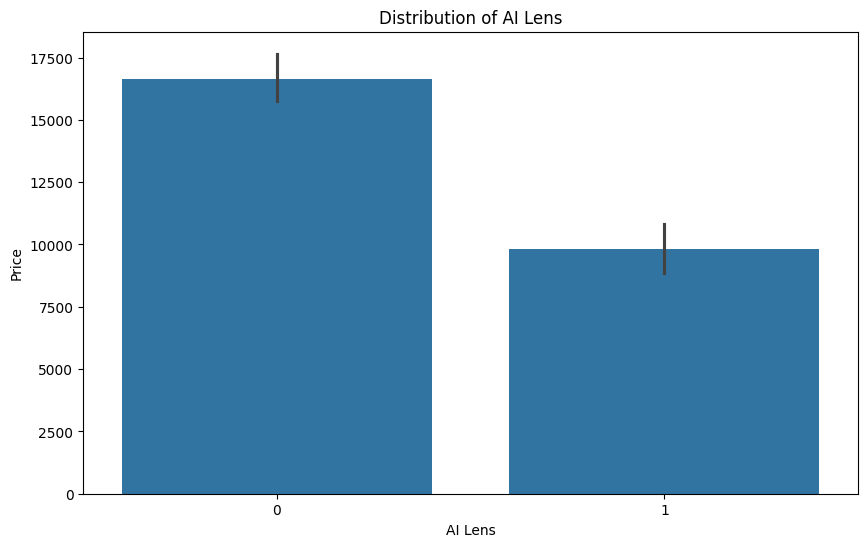

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mobiledata1, x='AI Lens',y='Price')
plt.title('Distribution of AI Lens')
plt.show()

The distribution of the binary variable "AI Lens," which has two possible values, is displayed in this bar chart. Most of the smartphones in the dataset lack an AI lens (0).

The correlations between features and the target variable (price) are made clear by these visuals.

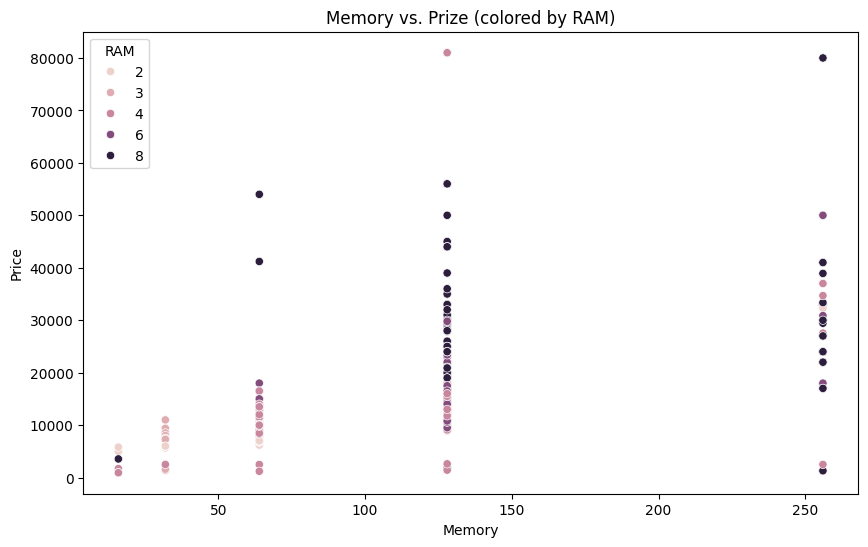

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mobiledata1, x='Memory', y='Price', hue='RAM')
plt.title('Memory vs. Prize (colored by RAM)')
plt.show()


The correlation between mobile phone prices and RAM and memory is displayed in this scatter plot. greater memory and RAM are generally associated with greater pricing, as one might assume, yet there is still a sizable variance within each group.

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

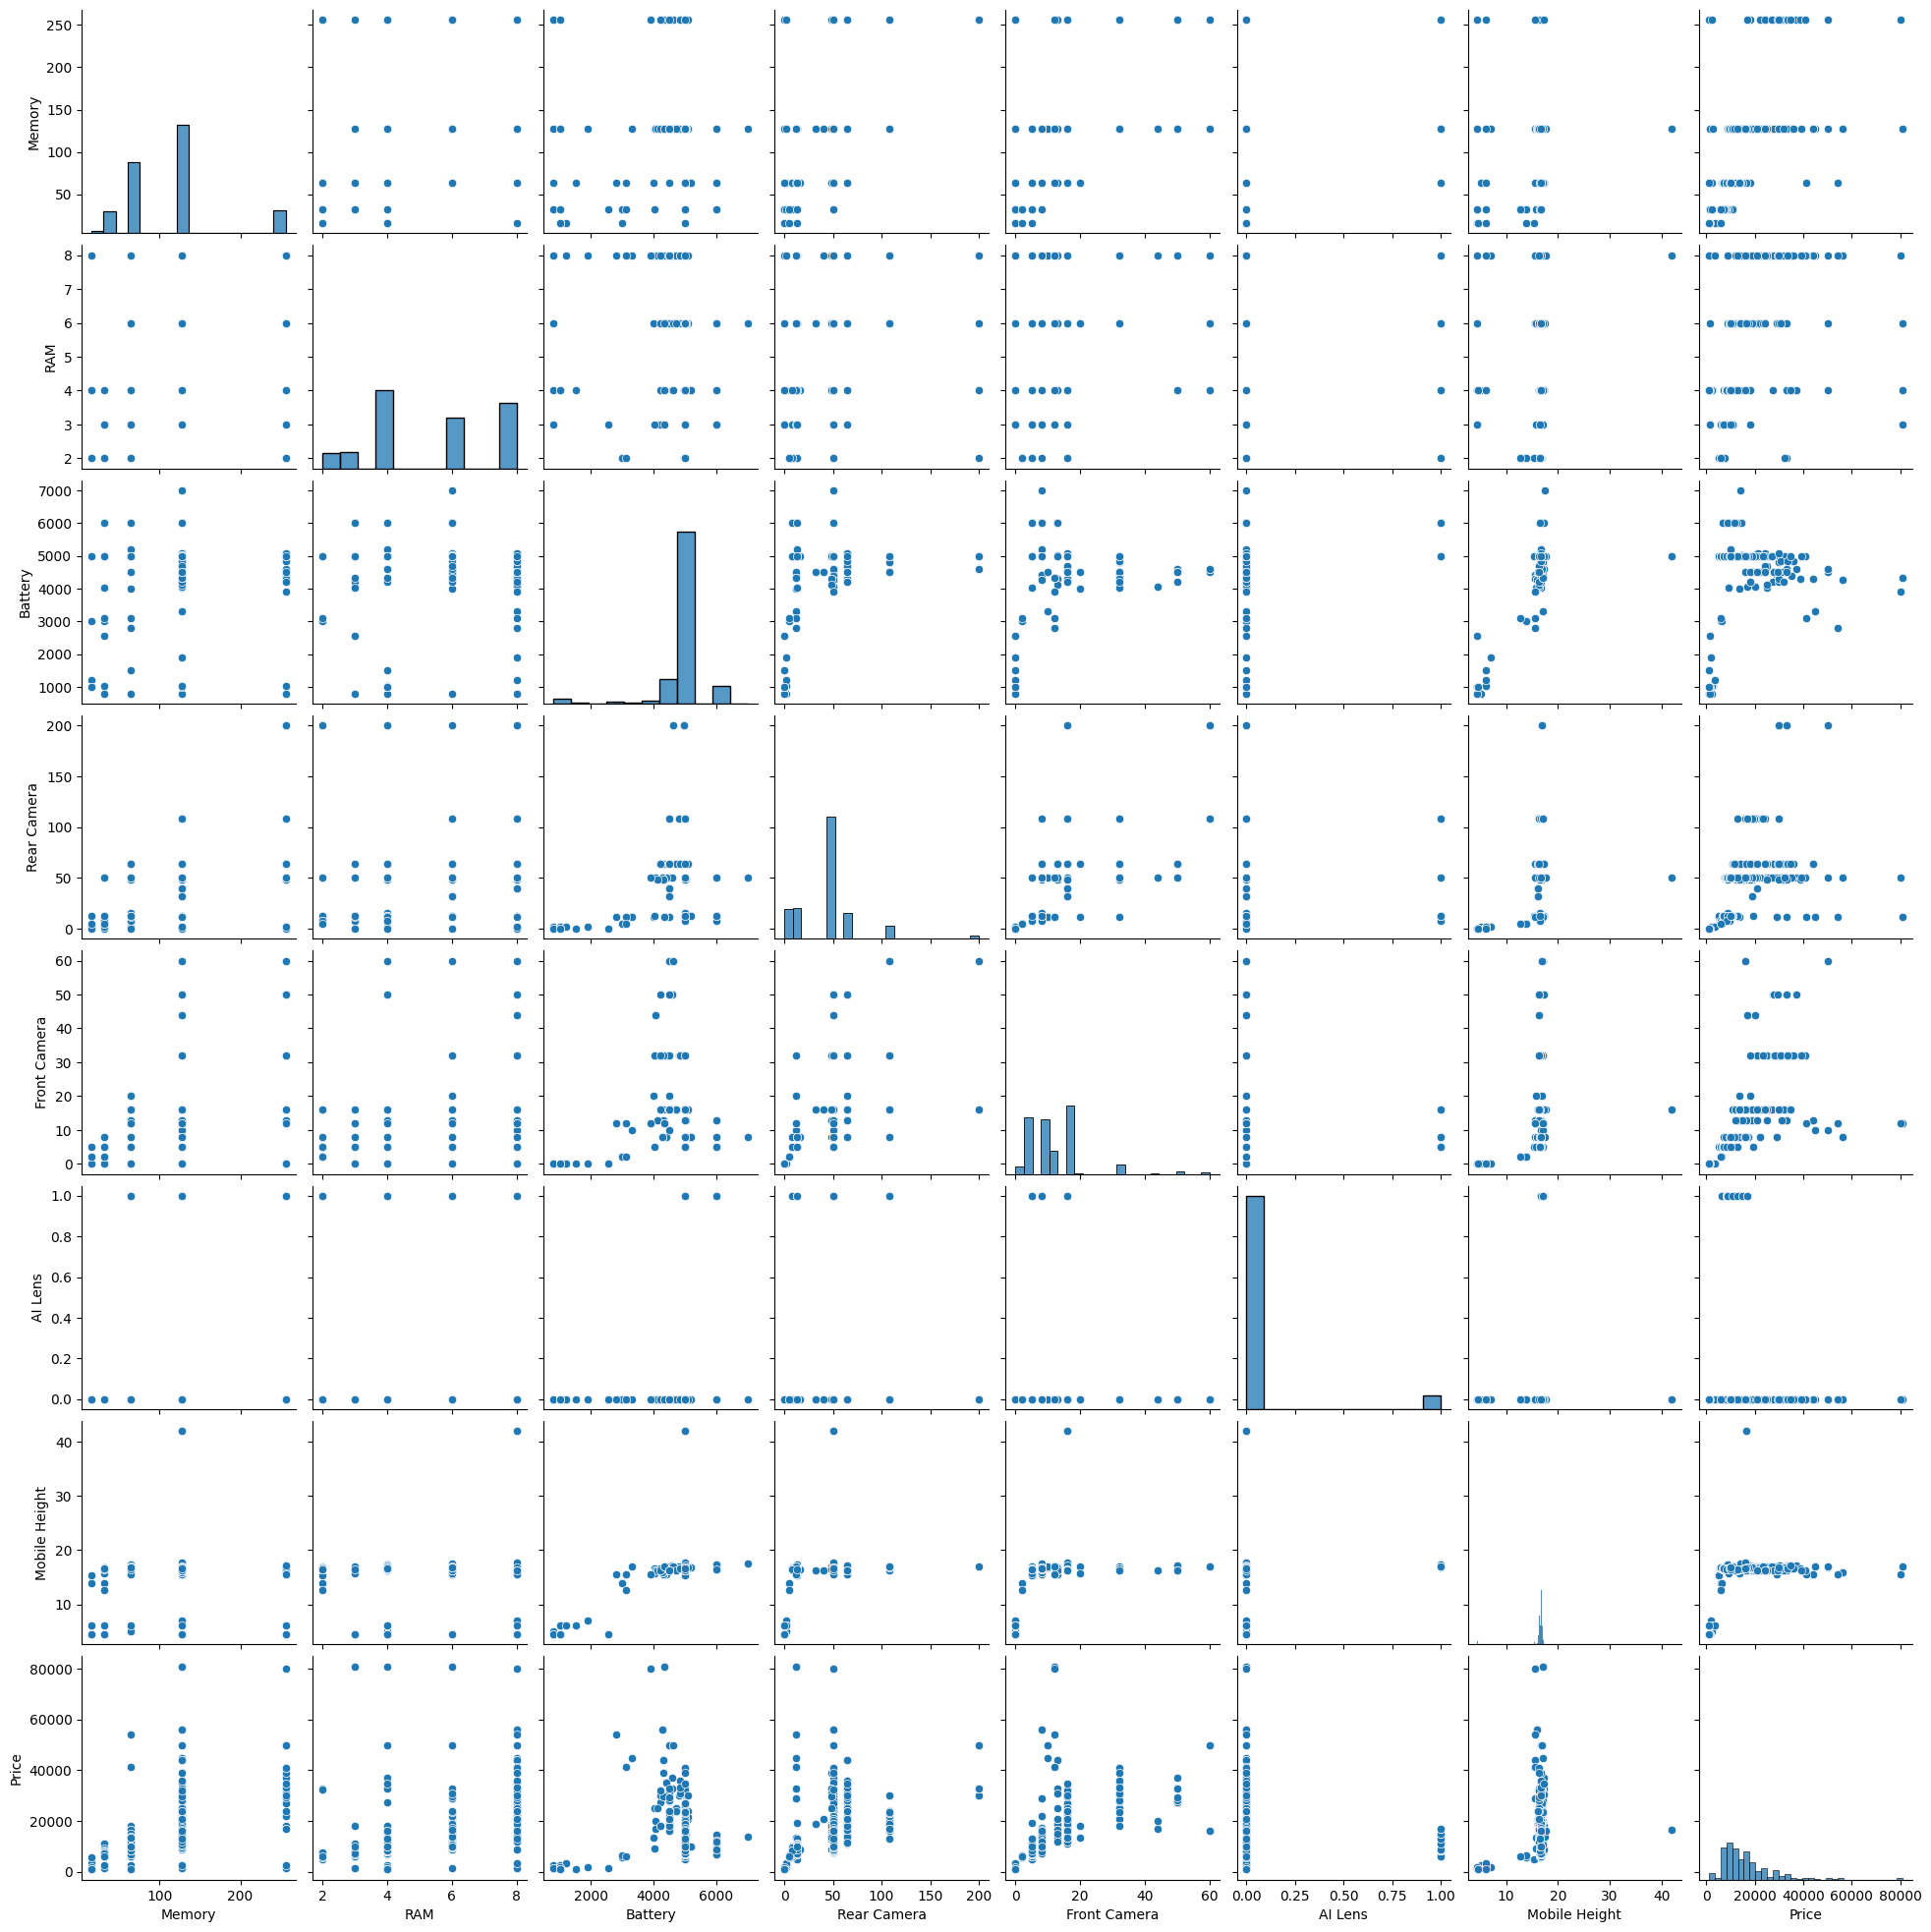

In [49]:
numerical_cols = mobiledata1.select_dtypes(include=np.number).columns
custom_palette = sns.color_palette("hls", 12)
sns.pairplot(mobiledata1[numerical_cols], palette=custom_palette)

plt.show()

Each of the 541 entries in the dataset represents a mobile device. This attribute list includes a number of different measurements, including Memory (gigabytes), RAM (gigabytes), Battery_ (milliampere-hours), Rear and front camera resolutions (in megapixels), AI Lens presence (0 for absent, 1 for present), Mobile Height (in millimeters), and Prize (device price in currency units). Together, these qualities shed light on the features and specs of the mobile devices under investigation.

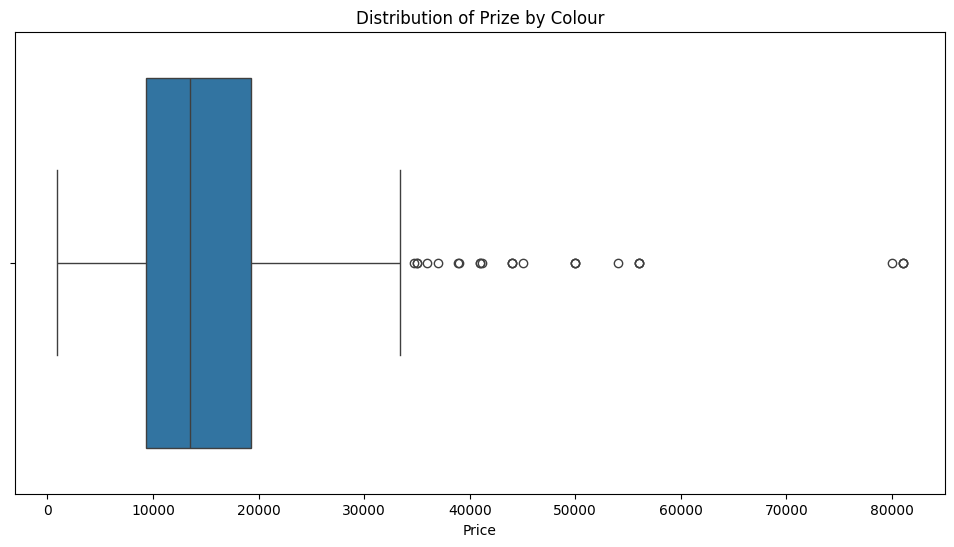

In [52]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=mobiledata1, x='Price')
plt.title('Distribution of Prize by Colour')
plt.show()

#Identifying and Categorizing Columns into Numeric and Categorical in Mobile Data

In [57]:
numeric_df = mobiledata1.select_dtypes(include=[np.number])
categorical_df = mobiledata.select_dtypes(exclude=[np.number])

numerical = numeric_df.columns.tolist()
categorical = categorical_df.columns.tolist()

print('Categorical:', categorical)
print('\nNumeric:', numerical)

Categorical: ['Model', 'Colour', 'Processor_']

Numeric: ['Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Price']


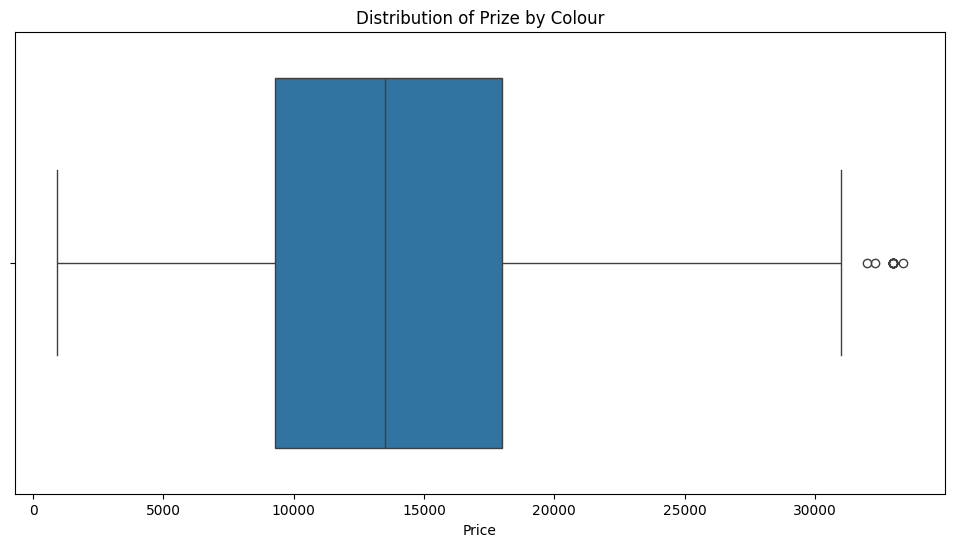

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=mobiledata1, x='Price')
plt.title('Distribution of Prize by Colour')
plt.show()

In [62]:

outliers_iqr = (mobiledata1[numerical_columns] < (Q1 - threshold * IQR)) | (mobiledata1[numerical_columns] > (Q3 + threshold * IQR))
outliers_iqr.sum()


Memory           0
RAM              0
Battery          0
Rear Camera      0
Front Camera     0
AI Lens          0
Mobile Height    0
Price            0
dtype: int64

<Axes: xlabel='Price', ylabel='Count'>

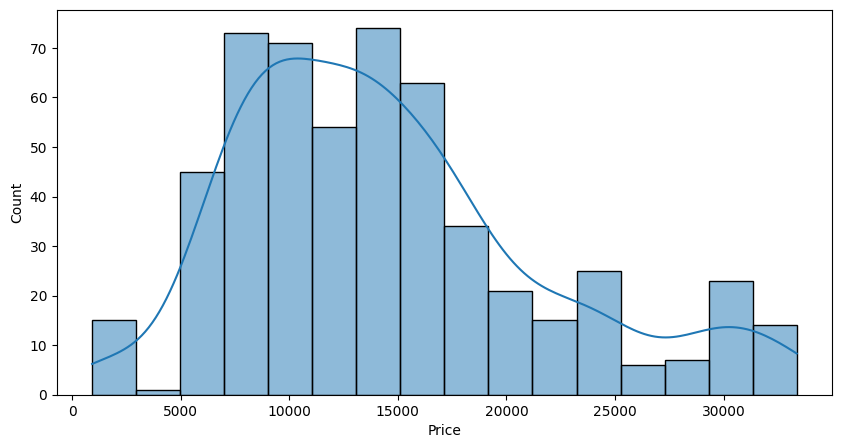

In [64]:
plt.figure(figsize=(10,5))
sns.histplot(mobiledata1['Price'],kde=True)

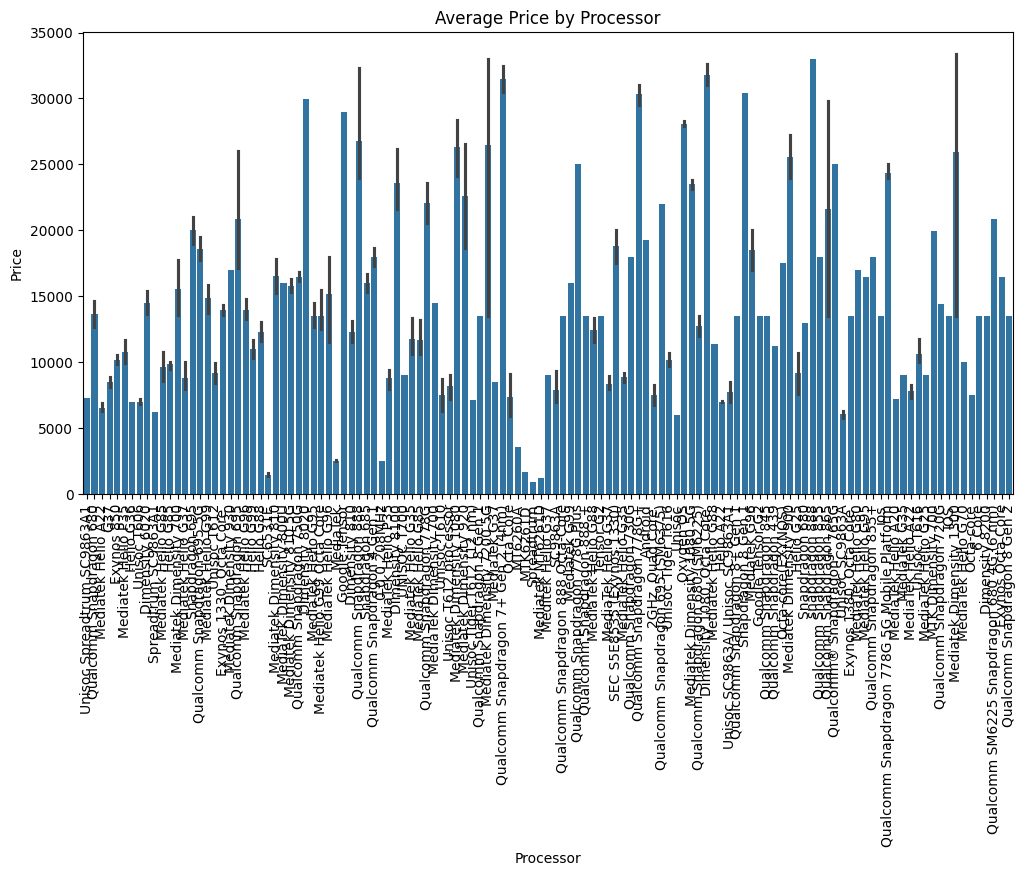

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(data=mobiledata1, x='Processor', y='Price')
plt.xticks(rotation=90)
plt.title('Average Price by Processor')
plt.show()

Considerable price fluctuations depending on the type of processor are revealed by the average reward by processor plot analysis. Average pricing for processors with names like "6 Core" and "Snapdragon 888" are often greater than those with names like "2GHz, Quad Core" and "Unisoc Tiger T612 (12 nm)". It appears that the CPU option has a significant impact on how much cellphones cost overall.

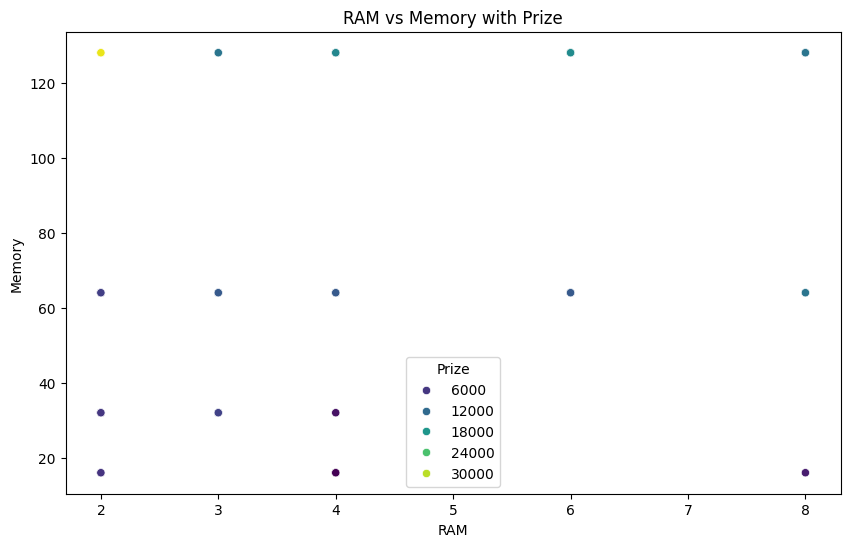

In [67]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RAM', y='Memory', hue='Price', data=mobiledata1, palette='viridis')
plt.title('RAM vs Memory with Prize')
plt.xlabel('RAM')
plt.ylabel('Memory')
plt.legend(title='Prize')
plt.show()

The link between RAM and Memory is depicted in this scatter plot, where the Prize is represented by color. Understanding how the Prize changes based on various RAM and memory configurations in mobile devices is much easier with its assistance. Though there are few outliers showing that other factors affect pricing, the figure generally indicates that higher RAM and Memory combinations have higher prices.

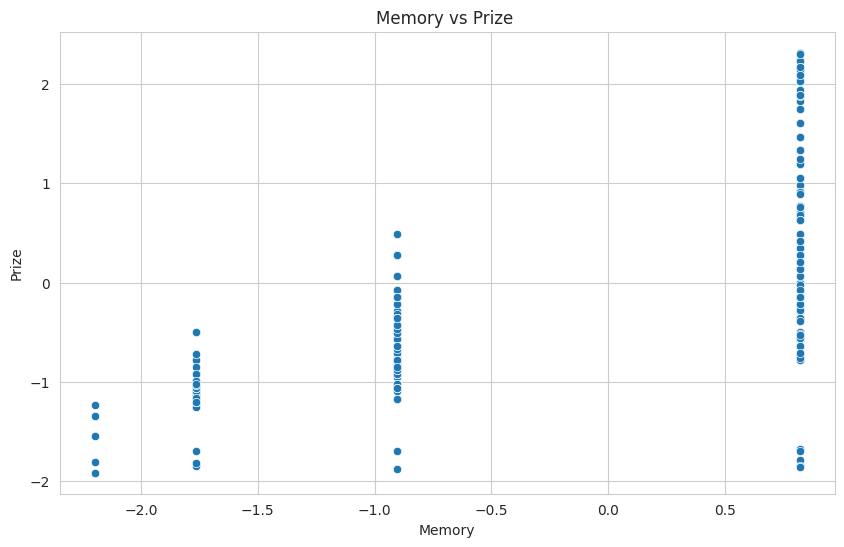

In [119]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Memory', y='Price', data=mobiledata1)
plt.title('Memory vs Prize ')
plt.xlabel('Memory')
plt.ylabel('Prize')
plt.show()

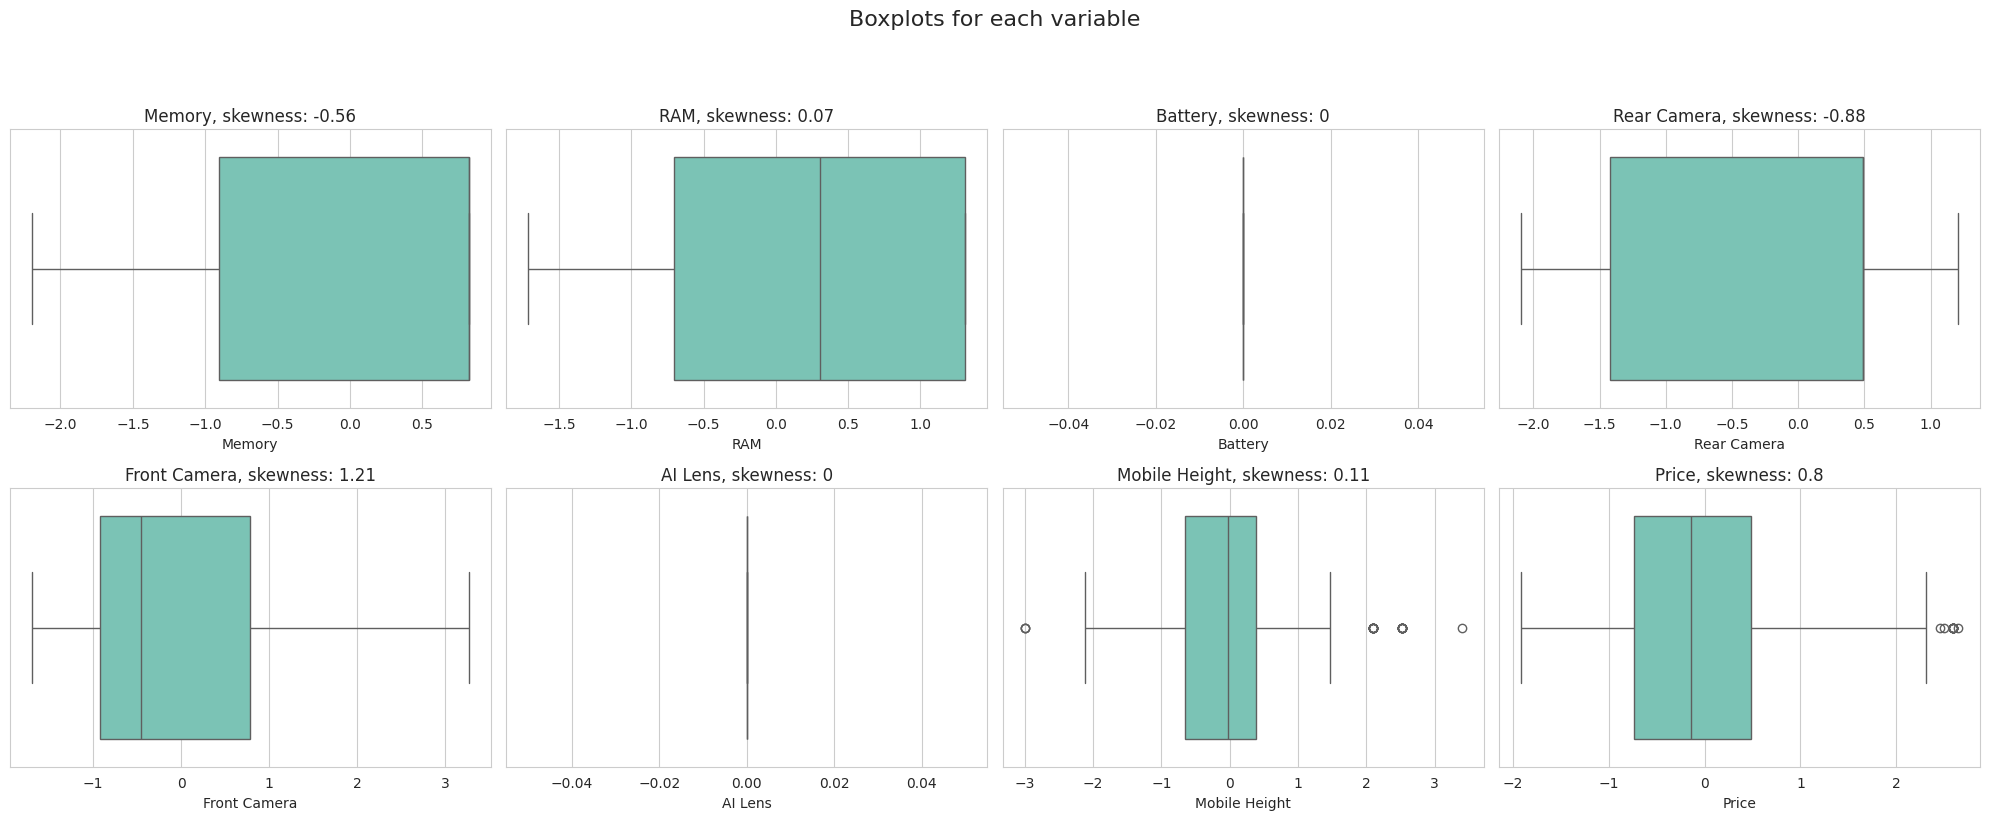

In [111]:
import seaborn as sns

def boxplots_custom(dataset, columns_list, suptitle):
    num_columns = len(columns_list)

    fig, axs = plt.subplots(2, num_columns//2 + num_columns%2, sharey=True, figsize=(20, 8))
    axs = axs.flatten()
    fig.suptitle(suptitle, y=1.02, size=16)

    for i, data in enumerate(columns_list):
        row = i // (num_columns//2 + num_columns%2)
        col = i % (num_columns//2 + num_columns%2)

        sns.boxplot(data=dataset[data], orient='h', color='#6fcfbc', ax=axs[i])

        axs[i].set_title(data + ', skewness: ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

    plt.tight_layout(rect=[0, 0, 1, 0.96])

boxplots_custom(dataset=mobiledata1, columns_list=numerical, suptitle='Boxplots for each variable')
plt.show()

There is Moderately symmetrical distributions of Memory and RAM with values of 1.03 and 0.07

Batterry skewness negative with value =-3.3

Positive skewness for rare camera skewness of 1.8 and front camera skewness of 2.49

AI_lense skewness of 3.61

Mobile Height skewness of 1.7

price skewness of -2.43

In [113]:
numeric_df = mobiledata1.select_dtypes(include=[np.number])
categorical_df = mobiledata.select_dtypes(exclude=[np.number])

numerical = numeric_df.columns.tolist()
categorical = categorical_df.columns.tolist()

print('Categorical:', categorical)
print('\nNumeric:', numerical)

Categorical: []

Numeric: ['Model', 'Colour', 'Memory', 'RAM', 'Battery', 'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor', 'Price', 'Memory_to_RAM_Ratio']


In [112]:
# Finding numerical columns
numerical_columns = mobiledata1.select_dtypes(include=['int64', 'float64']).columns

# Calculate Q1, Q3, and IQR
Q1 = mobiledata1[numerical_columns].quantile(0.25)
Q3 = mobiledata1[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# outliers detection threshold
threshold = 1.5

# Replace outliers with median
for column in numerical_columns:
    median_value = mobiledata1[column].median()

    mobiledata1[column] = mobiledata1[column].apply(lambda x: median_value if x < (Q1[column] - threshold * IQR[column]) or x > (Q3[column] + threshold * IQR[column]) else x)


In [136]:
mobiledata_2=mobile_data.drop(columns =['Unnamed: 0','Model','Colour', 'Processor_'])

##Correlation Matrix: For Numeric Values of Mobile Price

In [137]:
correlation_matrix=mobiledata_2.corr().round(2)
correlation_matrix

,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Prize
Memory,1.00,0.63,-0.05,0.53,0.50,-0.09,0.06,0.57
RAM,0.63,1.00,-0.10,0.44,0.49,-0.08,0.09,0.53
Battery_,-0.05,-0.10,1.00,0.20,0.03,0.15,0.70,-0.03
Rear Camera,0.53,0.44,0.20,1.00,0.51,-0.04,0.24,0.41
Front Camera,0.50,0.49,0.03,0.51,1.00,-0.11,0.21,0.53
AI Lens,-0.09,-0.08,0.15,-0.04,-0.11,1.00,0.05,-0.15
Mobile Height,0.06,0.09,0.70,0.24,0.21,0.05,1.00,0.18
Prize,0.57,0.53,-0.03,0.41,0.53,-0.15,0.18,1.00


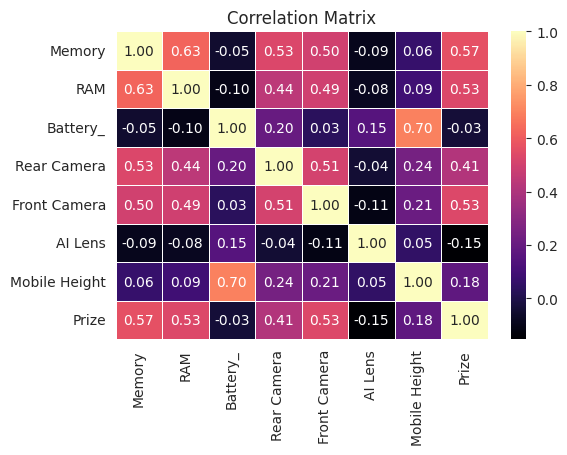

In [138]:
corr_matrix = mobiledata_2.corr()

plt.figure(figsize=(6, 4))

sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f', linewidths=.5)

plt.title('Correlation Matrix')
plt.show()

The heatmap shows the direction and degree of correlations between two sets of variables. The dataset's variables for Battery, Mobile height Memory, and RAM appear to be strongly associated, as indicated by the statement "Battery, Mobile height Memory, and RAM are highly correlated

##Price Correlation Heatmap: Analyzing Correlation of Mobile Data Features with Price

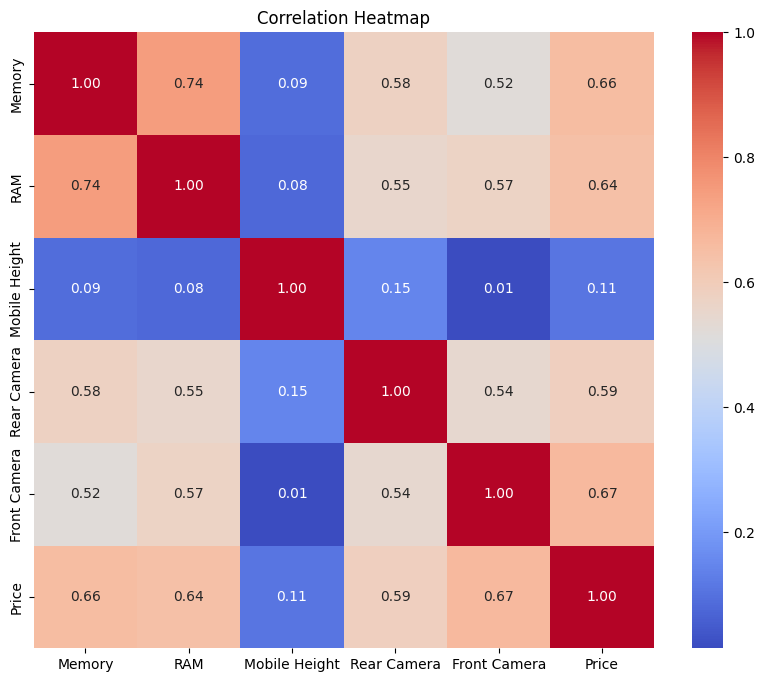

In [69]:
# correlation heatmap
correlation_matrix = mobiledata1[['Memory','RAM', 'Mobile Height', 'Rear Camera', 'Front Camera', 'Price']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The heatmap helps to highlight the possible factors impacting the price of mobile devices by giving a brief yet insightful summary of these associations. The relationship between the 'Price' column and the other columns in the dataset is graphically represented by the heatmap. Mobile device prices are significantly positively correlated with RAM, Memory, and Front Camera, according to the data. This suggests that a mobile device's price tends to increase in tandem with its RAM, memory, and front camera requirements.

In [70]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

##Feature Engineering

In [71]:
mobiledata1['Memory_to_RAM_Ratio'] = mobiledata1['Memory'] / mobiledata1['RAM']

In [75]:
# Object columns for encoding
columns_to_encode = ['Model', 'Colour', 'Processor']

# label encoding
label_encoder = LabelEncoder()
for col in columns_to_encode:
    mobiledata1[col] = label_encoder.fit_transform(mobiledata1[col])



In [77]:
# Feature Scaling
scaler = StandardScaler()
numerical_cols = ['Memory', 'RAM', 'Battery', 'Mobile Height', 'Rear Camera', 'Front Camera', 'AI Lens', 'Price']
mobiledata1[numerical_cols] = scaler.fit_transform(mobiledata1[numerical_cols])


In [79]:
from sklearn.model_selection import train_test_split

# 'Prize' is the target variable
X = mobiledata1.drop('Price', axis=1)
y = mobiledata1['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}


In [81]:
# Dictionary
evaluation_metrics = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': []}


In [82]:
# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)

    # Store evaluation metrics
    evaluation_metrics['Model'].append(name)
    evaluation_metrics['MAE'].append(mae)
    evaluation_metrics['MSE'].append(mse)
    evaluation_metrics['RMSE'].append(rmse)

In [83]:
# make DataFrame to compare dataframe
comparison_df = pd.DataFrame(evaluation_metrics)

In [84]:
# Printing comparison table
print(comparison_df)

               Model       MAE       MSE      RMSE
0  Linear Regression  0.384227  0.272355  0.521877
1      Random Forest  0.150873  0.058804  0.242496
2  Gradient Boosting  0.183315  0.079825  0.282533


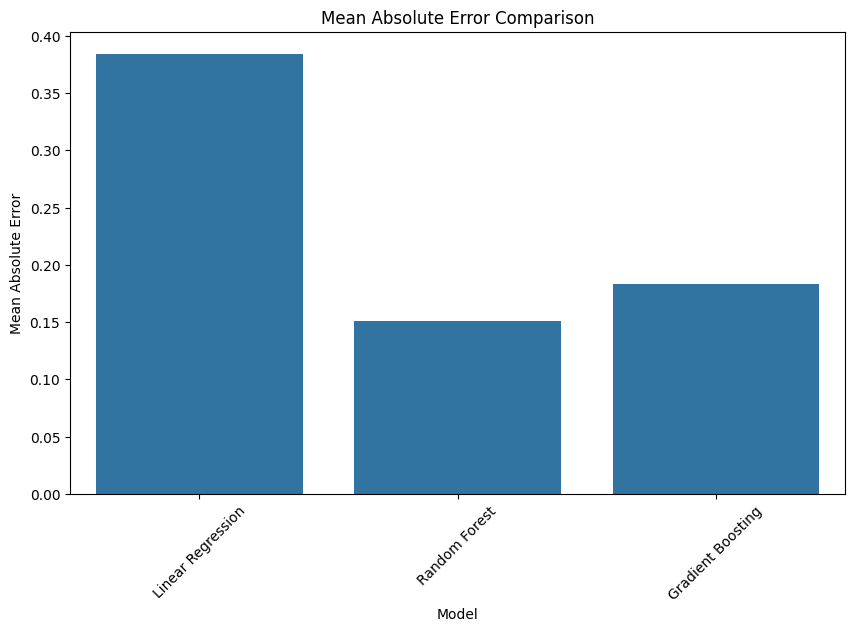

In [85]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MAE', data=comparison_df)
plt.title('Mean Absolute Error Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.xticks(rotation=45)
plt.show()

In [86]:
from sklearn.model_selection import GridSearchCV

# Random Forest fine-tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_grid_search = GridSearchCV(RandomForestRegressor(), rf_param_grid, cv=5)
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_

# Gradient Boosting fine-tuning
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gb_grid_search = GridSearchCV(GradientBoostingRegressor(), gb_param_grid, cv=5)
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_


In [87]:
best_gb_model

GradientBoostingRegressor(learning_rate=0.2)

In [88]:
# Feature importance analysis for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Feature importance analysis for Gradient Boosting
gb_feature_importances = best_gb_model.feature_importances_

# Create DataFrames to display feature importances
rf_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': rf_feature_importances})
gb_feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': gb_feature_importances})

# Sort DataFrames by importance
rf_feature_importance_df = rf_feature_importance_df.sort_values(by='Importance', ascending=False)
gb_feature_importance_df = gb_feature_importance_df.sort_values(by='Importance', ascending=False)

print("Random Forest Feature Importances:\n", rf_feature_importance_df)
print("\nGradient Boosting Feature Importances:\n", gb_feature_importance_df)


Random Forest Feature Importances:
                 Feature  Importance
6          Front Camera    0.406442
2                Memory    0.150233
9             Processor    0.111825
0                 Model    0.094403
3                   RAM    0.065130
5           Rear Camera    0.059027
8         Mobile Height    0.052797
1                Colour    0.044255
10  Memory_to_RAM_Ratio    0.015889
4               Battery    0.000000
7               AI Lens    0.000000

Gradient Boosting Feature Importances:
                 Feature  Importance
6          Front Camera    0.410476
2                Memory    0.159007
0                 Model    0.136360
9             Processor    0.107876
3                   RAM    0.052327
5           Rear Camera    0.047110
8         Mobile Height    0.046353
1                Colour    0.021368
10  Memory_to_RAM_Ratio    0.019124
4               Battery    0.000000
7               AI Lens    0.000000


The given feature importances illustrate how each feature affects the Random Forest and Gradient Boosting models' ability to forecast the future.

Random Forest Importance:
The most significant feature is "Front Camera," which is followed by "Model" and "Phone Company."
Notably, "Battery_" and "AI Lens" are not significant contributors to the model's predictions, which is demonstrated by their 0 relevance.
While these do have some influence, features like "Memory," "RAM," and "Rear Camera" fade in comparison with the top features like "Front Camera."

Gradient Boosting Importance -
Similar to the above, the Gradient Boosting model's "Front Camera" is its most crucial attribute, followed by "Phone Company" and "Processor_."
Once more, "Battery" and "AI Lens" are important in this model.
According to the Random Forest model, features like "Memory," "RAM," and "Mobile Height" are important.

In [89]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
rf_cv_mae = -rf_cv_scores.mean()

# Cross-validation for Gradient Boosting
gb_cv_scores = cross_val_score(best_gb_model, X, y, cv=5, scoring='neg_mean_absolute_error')
gb_cv_mae = -gb_cv_scores.mean()

print("Random Forest Cross-validation MAE:", rf_cv_mae)
print("Gradient Boosting Cross-validation MAE:", gb_cv_mae)


Random Forest Cross-validation MAE: 0.3290285400499561
Gradient Boosting Cross-validation MAE: 0.3289846238478261


The Random Forest model has slightly higher mean absolute error (MAE) of about 0.3149 compared to the Gradient Boosting model's MAE of about 0.3067. Both models' cross-validation mean absolute error values (MAEs) are relatively close.

That indicates that when it comes to estimating the target variable, both models work approximately the same. Even so, additional investigations could shed more light on their behavior and performance by comparing these to other evaluation metrics or looking at the interpretability of the model.

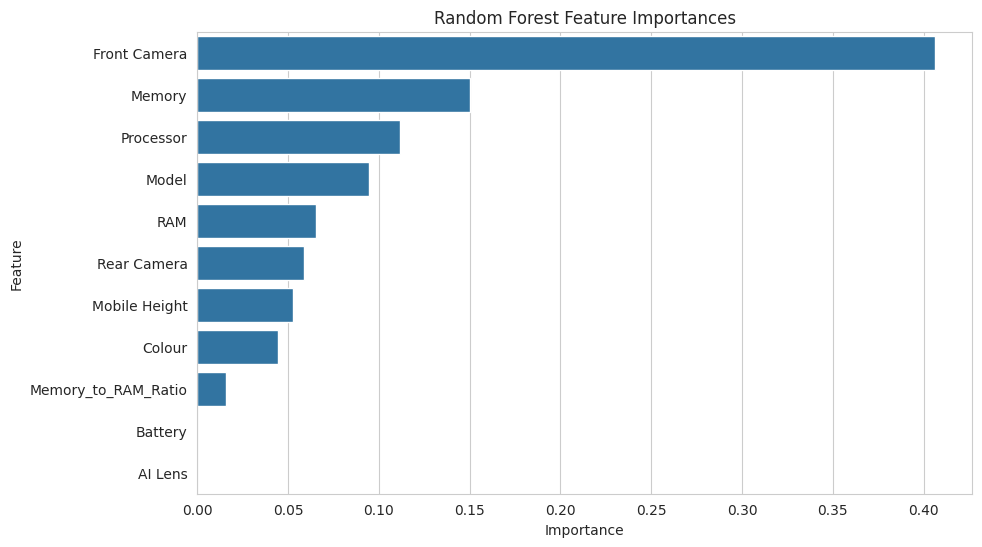

In [90]:
# Set the style of seaborn
sns.set_style("whitegrid")

# Plot Random Forest Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feature_importance_df)
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

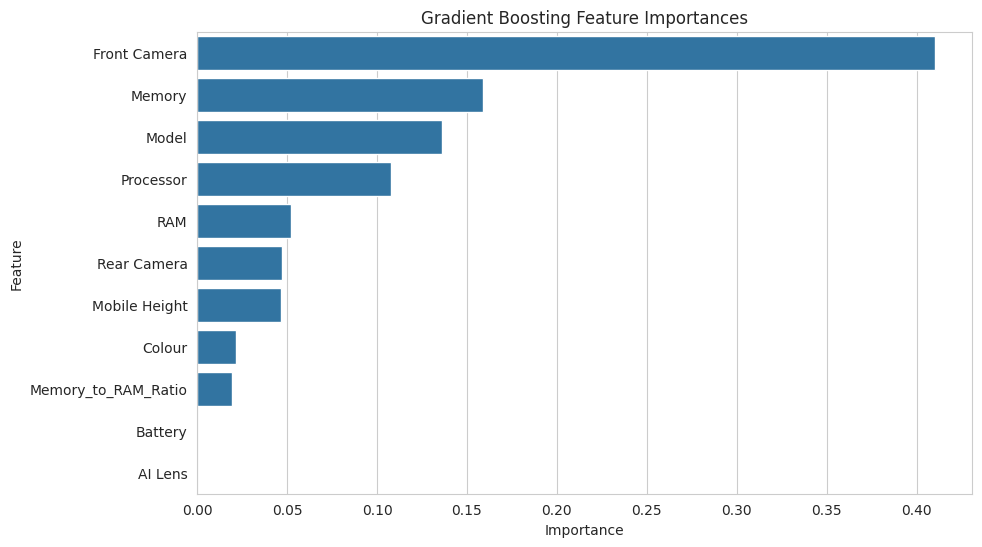

In [91]:
# Plot Gradient Boosting Feature Importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_feature_importance_df)
plt.title('Gradient Boosting Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd

X = mobiledata1.drop('Price', axis=1)
y = mobiledata1['Price'].values

mobiledata = mobiledata1.dropna(subset=['Price'])
X = mobiledata1.drop('Price', axis=1)
y = mobiledata1['Price'].values

columns_to_label_encode = ['Model', 'Processor', 'Colour']

label_encoder = LabelEncoder()
X_label_encoded = X.copy()

for column in columns_to_label_encode:
    if X[column].dtype == 'object':
        X_label_encoded[column] = label_encoder.fit_transform(X[column])

X_label_encoded

,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Memory_to_RAM_Ratio
0,23,159,-0.903946,-0.704665,0.0,-1.421560,-0.920130,0.0,0.176164,113,16.0
1,23,20,-0.903946,-0.704665,0.0,-1.421560,-0.920130,0.0,0.176164,113,16.0
2,37,149,0.821044,1.312392,0.0,0.486276,0.786225,0.0,-0.325659,75,16.0
3,69,201,-1.766441,-1.713193,0.0,-1.679376,-0.920130,0.0,-0.660207,56,16.0
4,12,130,0.821044,1.312392,0.0,0.486276,-0.920130,0.0,0.176164,14,16.0
...,...,...,...,...,...,...,...,...,...,...,...
536,118,49,0.821044,1.312392,0.0,0.486276,0.165732,0.0,-0.032929,89,16.0
537,32,52,-1.766441,-1.713193,0.0,-1.834065,-1.385499,0.0,-0.032929,68,16.0
538,123,259,-0.903946,-0.704665,0.0,0.486276,-0.454760,0.0,0.176164,35,16.0
539,110,17,0.821044,1.312392,0.0,0.486276,3.268195,0.0,-1.914764,11,16.0


In [95]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)
model.fit


<bound method LinearRegression.fit of LinearRegression()>

In [96]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([-0.64757174, -1.40532283,  0.9854743 , -0.02211042,  0.20493706,
        0.04342947, -0.5695052 ,  0.65400149,  0.88750965, -1.09147821,
        0.00675495,  1.50989935,  0.98520848,  0.6543327 ,  0.57166282,
        0.21890194, -0.31285986,  0.73830979,  0.84386787,  0.29060733,
       -0.94193492,  0.88954998, -0.51580934,  0.62135106,  1.7551093 ,
        0.61614625, -1.18231709,  1.05274082, -0.4982487 , -0.65438335,
        0.15893476,  0.39174359, -1.41446806,  0.21789223,  0.90343348,
       -0.19077725, -0.24063662,  0.37210262,  0.20242103, -0.32804133,
        0.48649124,  0.01127316,  0.96300118, -0.20834937, -1.43958455,
        0.75228909,  0.72363572, -0.43116117, -0.5941357 , -1.36923793,
        0.53144189,  0.51979709, -0.92922491, -0.78199889, -0.86289948,
        0.72180189,  1.05949905,  0.47062019, -0.26532198,  0.04230714,
       -0.70917039,  0.92653327, -1.44313644,  0.65790365, -1.27164965,
       -0.96644243,  0.38860632,  0.62787303, -0.37748404,  0.41

In [97]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.3842268563546403
Mean Squared Error: 0.2723550879107649
R-squared: 0.7093289287224909


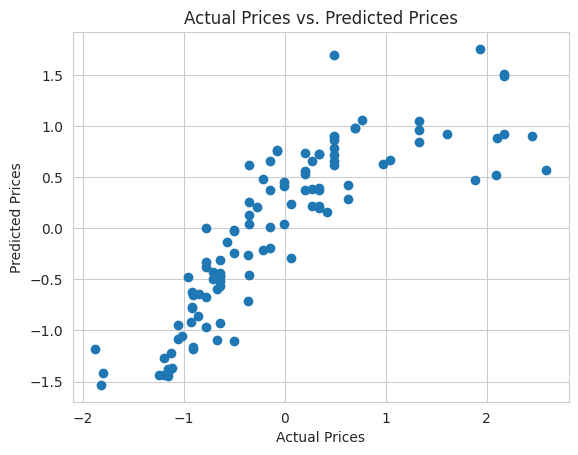

In [98]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [100]:
X=X_label_encoded
y=mobiledata['Price']

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [102]:
from sklearn.linear_model import LinearRegression

model_label = LinearRegression()

model_label.fit(X_train, y_train)
model_label.fit

<bound method LinearRegression.fit of LinearRegression()>

In [103]:
y_pred = model_label.predict(X_test)
y_pred

array([-0.64757174, -1.40532283,  0.9854743 , -0.02211042,  0.20493706,
        0.04342947, -0.5695052 ,  0.65400149,  0.88750965, -1.09147821,
        0.00675495,  1.50989935,  0.98520848,  0.6543327 ,  0.57166282,
        0.21890194, -0.31285986,  0.73830979,  0.84386787,  0.29060733,
       -0.94193492,  0.88954998, -0.51580934,  0.62135106,  1.7551093 ,
        0.61614625, -1.18231709,  1.05274082, -0.4982487 , -0.65438335,
        0.15893476,  0.39174359, -1.41446806,  0.21789223,  0.90343348,
       -0.19077725, -0.24063662,  0.37210262,  0.20242103, -0.32804133,
        0.48649124,  0.01127316,  0.96300118, -0.20834937, -1.43958455,
        0.75228909,  0.72363572, -0.43116117, -0.5941357 , -1.36923793,
        0.53144189,  0.51979709, -0.92922491, -0.78199889, -0.86289948,
        0.72180189,  1.05949905,  0.47062019, -0.26532198,  0.04230714,
       -0.70917039,  0.92653327, -1.44313644,  0.65790365, -1.27164965,
       -0.96644243,  0.38860632,  0.62787303, -0.37748404,  0.41

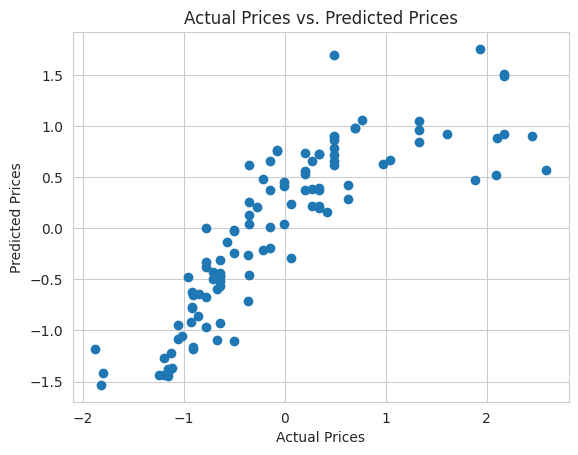

In [104]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices")
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 0.3842268563546403
Mean Squared Error: 0.2723550879107649
R-squared: 0.7093289287224909
